# Assignment (real project name to be here)

## Business understanding

Define business problem that needs to be solved.
- What is the goal of the analysis?
- What are the requirements and constraints?
- What is the expected outcome?

In [1]:
# hello world

## Data understanding

collect and explore the data.
- What data is available? What are the characteristics of the data (variable types, value distributions etc.)?
- Are there any quality issues with the data (missing values, outliers, nonsensical values)?

In [2]:
# hello world

## Data preparation

data preprocessing
- cleaning the data
- transforming the data
- selecting the relevant features

In [3]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [4]:
#importing data
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
real_estate_valuation = fetch_ucirepo(id=477) 
  
# data (as pandas dataframes) 
X = real_estate_valuation.data.features 
y = real_estate_valuation.data.targets 
  
# metadata 
print(real_estate_valuation.metadata) 
  
# variable information 
print(real_estate_valuation.variables) 


{'uci_id': 477, 'name': 'Real Estate Valuation', 'repository_url': 'https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set', 'data_url': 'https://archive.ics.uci.edu/static/public/477/data.csv', 'abstract': 'The real estate valuation is a regression problem. The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. ', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 414, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y house price of unit area'], 'index_col': ['No'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5J30W', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 373, 'type': 'NATIVE', 'title': 'Building real estate valuation models with comparative approach through case-based reasoning', 'authors': 'I. Yeh

In [5]:
from sklearn.model_selection import train_test_split

# Useful variable for future
randomstate = 123

# Do the 70/30 data split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=randomstate)

In [6]:
#Standardoidaan X:n valuet 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [8]:
# Kertoimet ja vakiotermi
print(f"Intercept: {linreg.intercept_}")
print("Coefficients:")

# Muutetaan koeffisientit 1D-taulukoksi
coefs = linreg.coef_[0]
features = X.columns

# Käydään nimet ja arvot läpi
for feature, coef in zip(features, coefs): # zip yhdistää kaksi listaa rinnakkain
    print(f"{feature}: {coef:.4f}")


Intercept: [38.20346021]
Coefficients:
X1 transaction date: 1.5032
X2 house age: -3.0049
X3 distance to the nearest MRT station: -6.0670
X4 number of convenience stores: 3.1549
X5 latitude: 2.7356
X6 longitude: -0.4031


In [9]:
# Ennusteita
y_pred = linreg.predict(X_test_scaled)

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")

Mean Squared Error: 52.324
Mean Absolute Error: 5.346


## Predicted vs. Actual

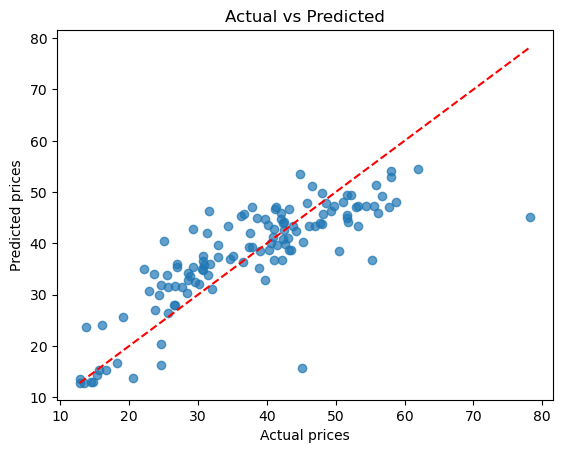

In [11]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonaali
plt.show()


Predictaa hyvin muutamia outliers lukuunottamatta

## Residual plot

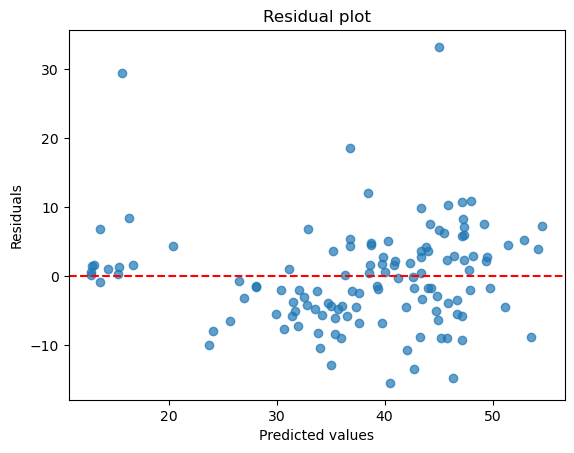

In [12]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()


Hieman heteroscedasticity (hajautuu enemmän mitä oikeammalle mennään)

## Feature importance

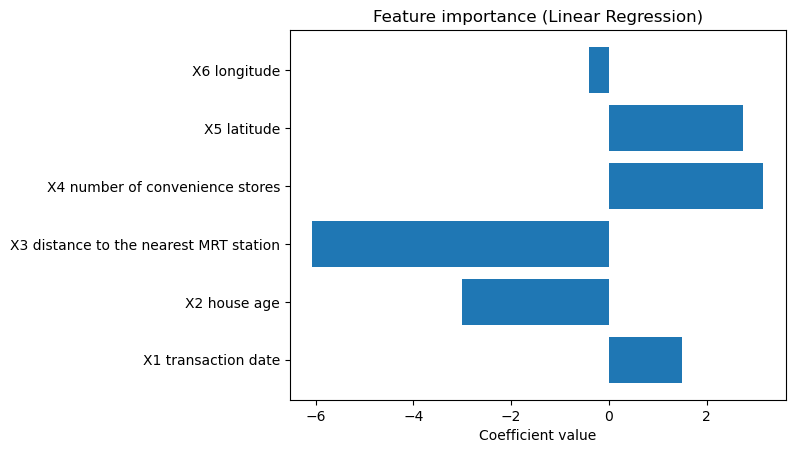

In [13]:
import numpy as np

plt.barh(features, coefs)
plt.xlabel("Coefficient value")
plt.title("Feature importance (Linear Regression)")
plt.show()


Positiivinen nostaa hintaa ja negatiivinen laskee hintaa (esim. mitä enemmän kauppoja, sitä korkeampi hinta tai mitä kauempana metrosta, sitä halvempi)

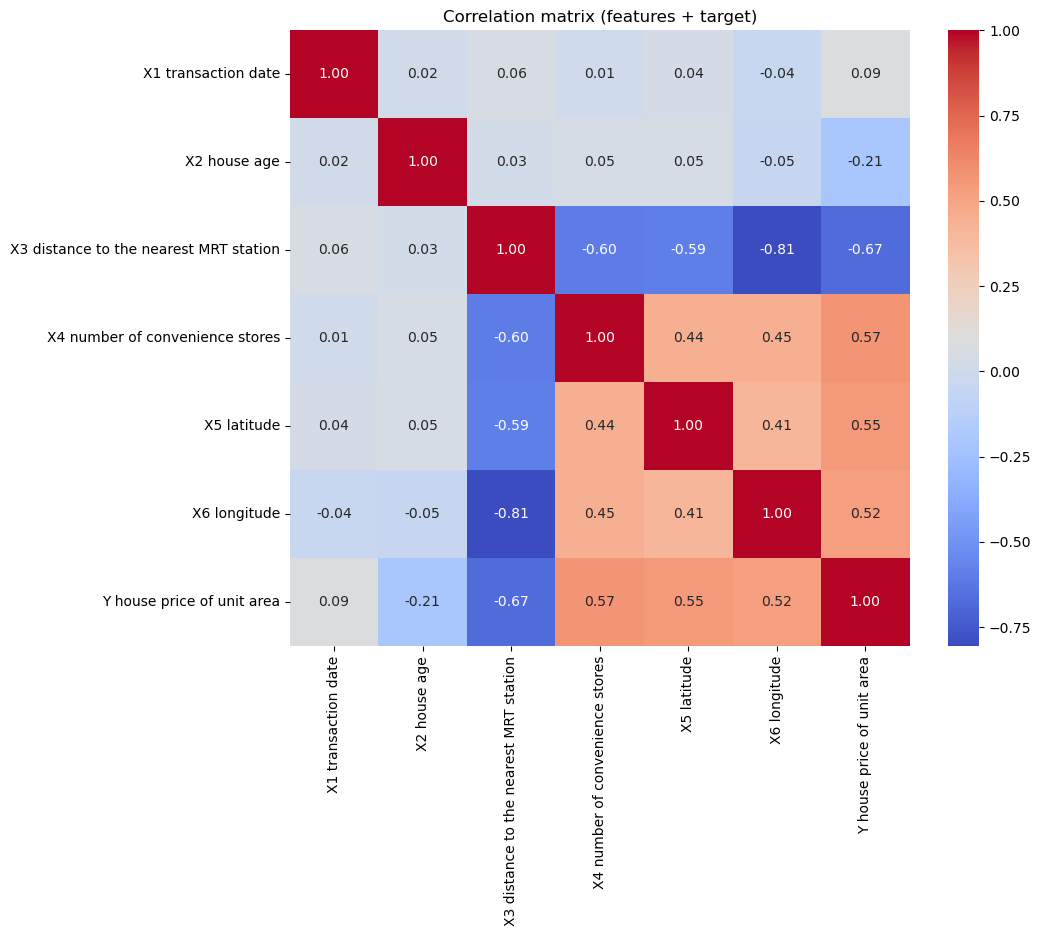

In [18]:
import seaborn as sns
import pandas as pd

# Yhdistetään piirteet ja target yhdeksi DataFrameksi
df_corr = pd.concat([X, y], axis=1)

# Lasketaan korrelaatiomatriisi
corr_matrix = df_corr.corr()

# Piirretään heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation matrix (features + target)")
plt.show()


## Modeling

choose a machine learning method and train the model (+ model validation)
- which method was used?
- which parameters were used?
- what was the performance of the model?

In [14]:
# hello world

## Evaluation

evaluate the model
- How well does the model perform?
- Does it meet the business requirements?

In [15]:
# hell world

## Deployment

johtopaatos / creating a recommendation of how to use the model in practice, or what to do next
- How will the model be used in practice?
- How will the results be communicated?

In [16]:
# hello world

### Reflection

#### Ai Usage
- for research

#### Team contribution
- who did what

#### Sources
- links & descriptions